# Introduction
This notebook explores AUTO mpg dataset. 


The objective of this data science project is to predict **miles per gallon (mpg)** for a given car. 

Before seeing the data let us answer 3 questions:

1. Is it a supervised, unsupervised, or Reinforcement Learning?
        This is a supervised learning. We know that we have to predict miles per gallon (mpg).
2. Is it a classification task, a regression task, or something else?
        We have to predict Miles per gallon. mpg is a measure of fuel economy of a car and it is a numerical value. Hence this is a regression task.
3. Should we use batch learning or online learning techniques?
        As there is no continuous flow of data coming into the system, so batch learning is enough.

In [1]:
#Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1. Getting the data

In [2]:
#Import dataset
auto_mpg_df = pd.read_csv('../Datasets/auto_mpg.csv', header = None)

In [3]:
#Viewing dataset. Column names need to be updated.
auto_mpg_df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
#Column names are given as list
auto_mpg_df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year',
                       'origin','car_name']

In [5]:
#Saving orginal data
auto_mpg_data = auto_mpg_df.copy()

In [6]:
#check datatypes
def check_datatypes(auto_data):
    data_types = auto_data.dtypes.reset_index()
    data_types.columns = ['column','data_type']
    return data_types

In [7]:
data_types = check_datatypes(auto_mpg_df)

In [8]:
data_types

,column,data_type
0,mpg,float64
1,cylinders,int64
2,displacement,float64
3,horsepower,object
4,weight,int64
5,acceleration,float64
6,model_year,int64
7,origin,int64
8,car_name,object


We have 7 numeric(3 continuous and 4 discrete) and 2 object columns. Don't you think that 'horsepower' should be a numeric value and not an object? Then, let us change the datatype of horsepower from object to numeric.

df['horsepower'] = df['horsepower'].astype('float64')

This line of code throws as error saying "could not convert string to float: '?'". What does this mean?
This means that this column has an entry with value '?' and this cannot be converted to float. Let us check how many rows have '?' in 'horsepower' columns.

In [9]:
auto_mpg_df.loc[auto_mpg_df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


There are 6 rows with '?' in the column 'horsepower'. Let us get rid of these rows for now.

In [10]:
auto_mpg_df = auto_mpg_df.loc[auto_mpg_df['horsepower']!='?']

In [11]:
#Now changing the data type to float
auto_mpg_df['horsepower'] = auto_mpg_df.horsepower.astype('float64')

In [12]:
#Viewing updated datatypes
data_type = check_datatypes(auto_mpg_df)
data_type

,column,data_type
0,mpg,float64
1,cylinders,int64
2,displacement,float64
3,horsepower,float64
4,weight,int64
5,acceleration,float64
6,model_year,int64
7,origin,int64
8,car_name,object


# 2. Univariate analysis

In [13]:
auto_mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


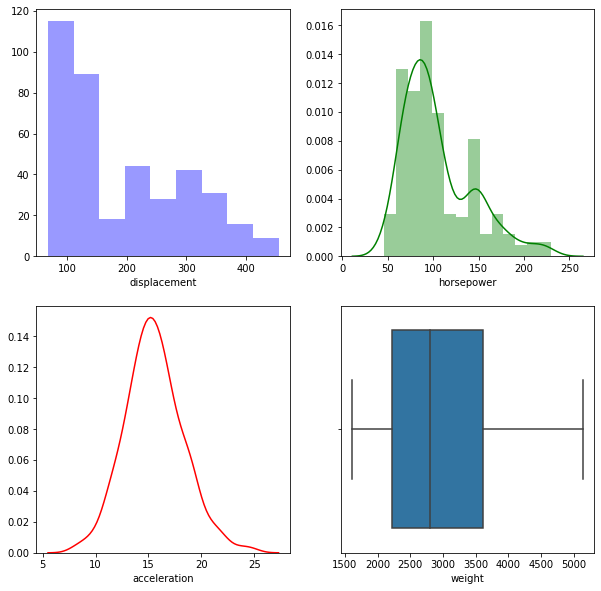

In [14]:
f, axes = plt.subplots(2,2, figsize = (10,10))
#f : figure is top level container for all elements
#ax indicates axes of the figure
sns.distplot(auto_mpg_df.displacement, color='b', kde=False, ax=axes[0,0])
sns.distplot(auto_mpg_df.horsepower, color = 'g', ax = axes[0,1])
sns.distplot(auto_mpg_df.acceleration, hist=False, color = 'r', ax = axes[1,0])
sns.boxplot(auto_mpg_df.weight, ax = axes[1,1])

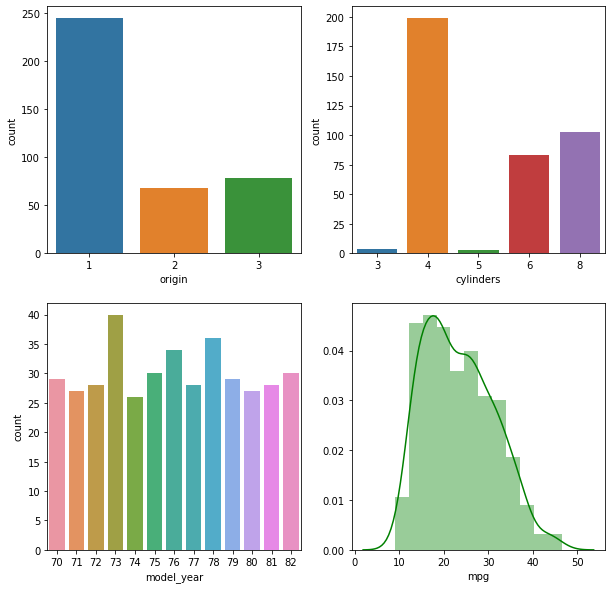

In [15]:
f, axes = plt.subplots(2,2,figsize = (10,10))
sns.countplot(auto_mpg_df.origin, ax=axes[0,0])
sns.countplot(auto_mpg_df.cylinders, ax=axes[0,1])
sns.countplot(auto_mpg_df.model_year, ax = axes[1,0])
sns.distplot(auto_mpg_df.mpg,color = 'g', ax = axes[1,1])

# 3. Bivariate analysis

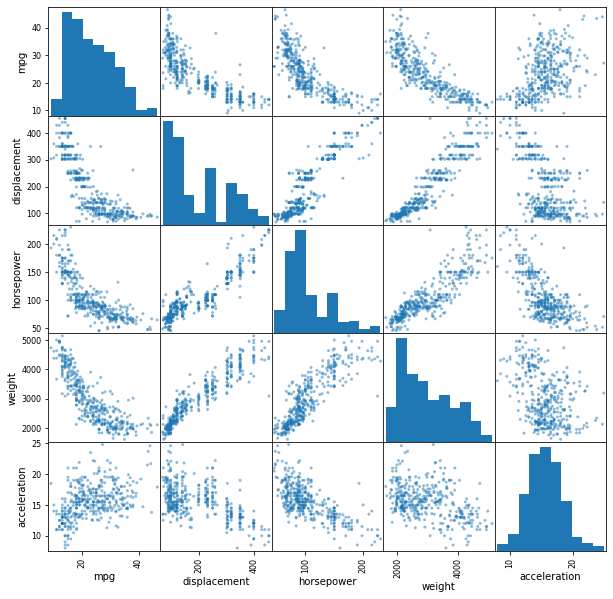

In [16]:
#numerical data relationship with mpg
from pandas.plotting import scatter_matrix
num = ['mpg','displacement','horsepower','weight','acceleration']
scatter_matrix(auto_mpg_df[num], figsize=(10,10))
plt.show()

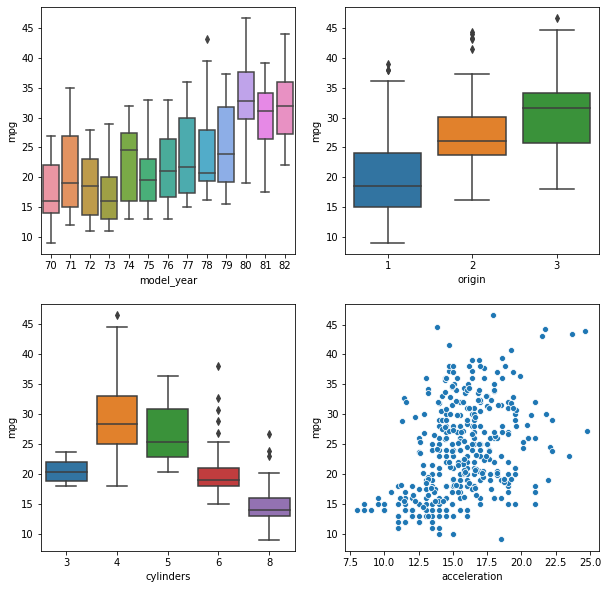

In [17]:
#categorical variable relationship with mpg
f, ax = plt.subplots(2,2,figsize = (10,10))
sns.boxplot(x = 'model_year', y = 'mpg', data = auto_mpg_df, ax = ax[0,0])
sns.boxplot(x = 'origin' , y = 'mpg', data = auto_mpg_df, ax = ax[0,1])
sns.boxplot(x = 'cylinders', y = 'mpg', data = auto_mpg_df, ax = ax[1,0])
sns.scatterplot(x = 'acceleration', y='mpg', data = auto_mpg_df, ax=ax[1,1])

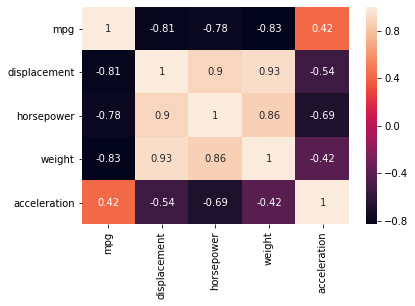

In [18]:
#correlation map
corr = auto_mpg_df[num].corr()
sns.heatmap(corr, annot = True)

##### In the above heatmap, mpg is strongly and negatively correlated with displacement, horsepower and weight.  

# 4. Train and Test split

In [19]:
#Using saved data
auto_mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [20]:
#separating features and target. Dropping car_name from analysis
X = auto_mpg_data.drop(columns=['mpg','car_name'])
y = auto_mpg_data['mpg']

In [21]:
#Splitting data into train and test set by 75% and 25% respectively. Using 'cylinders' in stratify to preserve
#percentage of samples in each class
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, 
                                                    stratify = X['cylinders'])

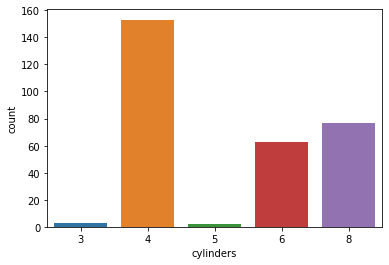

In [22]:
#count of labels in cylinder for train data
sns.countplot(X_train.cylinders)

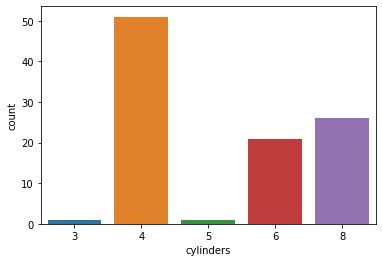

In [23]:
#count of labels in cylinder for test data
sns.countplot(X_test.cylinders)

In [24]:
#Viewing data split
print('Train dataset features:',X_train.shape)
print('Train dataset target:',y_train.shape)
print('Test dataset features:',X_test.shape)
print('test dataset target:',y_test.shape)

Train dataset features: (298, 7)
Train dataset target: (298,)
Test dataset features: (100, 7)
test dataset target: (100,)


# 5. Data transformation pipeline

#### 1. Invalid data check
#### 2. Handling missing data
#### 3. Feature scaling
#### 4. categorical data transformation

In [25]:
#Implementing a class for checking invalid data (data containing '?')
from sklearn.base import BaseEstimator, TransformerMixin

class CheckData(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        return
    
    def fit(self, X, y = None):
        return self #Nothing else to do
    
    def transform(self, X, y = None):
        X = X.applymap(self.check_data)
        return X
    
    def check_data(self,x):
        if(x == '?'):#check for other types of errors
            return np.nan
        else:
            return x

In [26]:
#Data preprocessing pipeline 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = ['displacement', 'horsepower', 'weight','acceleration',]
cat_attribs = ['cylinders','model_year', 'origin']

#Numeric features pipeline
num_pipeline = Pipeline([
        ('check', CheckData()),
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

#categorical features pipeline
cat_pipeline = Pipeline([
        ('imputer',SimpleImputer(strategy="most_frequent")),
        ('one_hot_encoder', OneHotEncoder())
])


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])
#Transforming Train and test data
auto_transformer = full_pipeline.fit(X_train)
X_train_prepared = auto_transformer.transform(X_train)
X_test_prepared = auto_transformer.transform(X_test)

In [27]:
#Naive base model using mean_squared_error as the metrics
from sklearn.metrics import mean_squared_error

#predicting the mean of mpg as mpg for all the new samples
mpg_mean = np.mean(y_train)
y_pred_base = np.full(len(X_test),mpg_mean)

print('Test loss with naive model is....')
print(np.sqrt(mean_squared_error(y_pred_base,y_test)))

Test loss with naive model is....
8.20489167172329


In [28]:
#Fitting linear model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
auto_mpg_model = model.fit(X_train_prepared,y_train)

#predicting mpg for test data and evaluating performance using 'mean squared error as metrics'
y_pred = auto_mpg_model.predict(X_test_prepared)
print('Test loss is :',np.sqrt(mean_squared_error(y_pred, y_test)))

Test loss is : 2.97311320494572


In [29]:
#cross validation and hyperparameter tuning with ridge regression
from sklearn.linear_model import Ridge
model = Ridge()

param_grid = [{'alpha': [.001,.01,.1,1,10,100]}]
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv = 5, iid = True)
grid_search.fit(X_train_prepared, y_train)
y_pred = grid_search.predict(X_test_prepared)

print('Test loss is :',np.sqrt(mean_squared_error(y_pred, y_test)))

Test loss is : 2.9592858555356845


In [30]:
grid_search.best_params_

{'alpha': 1}

### Performance improves by just 0.01 from linear regression to ridge regression. Future work :
### 1. Increase model complexity
### 2. Explore feature importance